### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the [linear regression example from the class notes](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/regression/linear-regression/linear_regression.html), develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

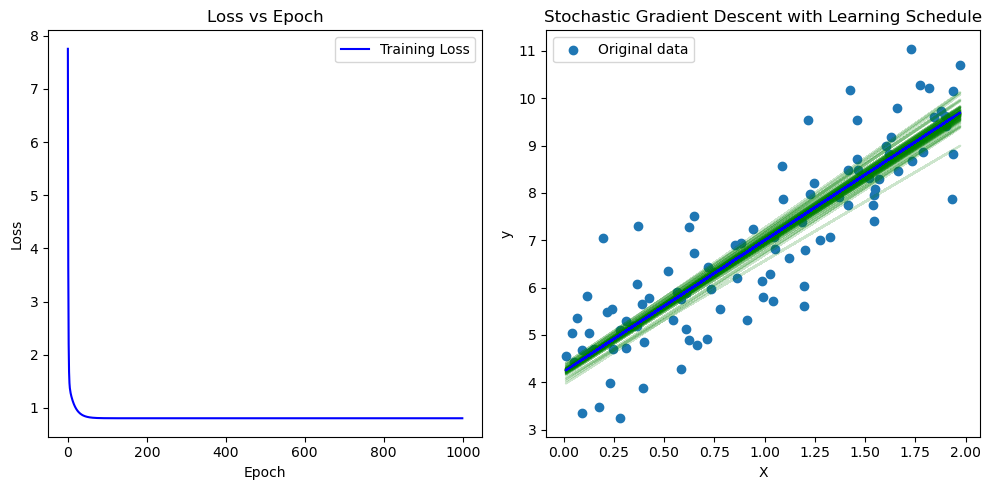

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate mean squared error (loss)
def mean_squared_error(X_b, y, theta):
    m = len(y)
    return np.sum((X_b.dot(theta) - y)**2) / m

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) 


loss_values = []
epochs = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

    # Calculate and store the loss after each iteration
    loss = mean_squared_error(X_b, y, theta)
    loss_values.append(loss)
    epochs.append(iteration)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

# Continue with the original code for data and regression line
plt.subplot(1, 2, 2)
plt.scatter(X_b[:, 1], y, label='Original data')

# Plot the initial regression line
plt.plot(X_b[:, 1], X_b.dot(theta), color='red')

# Training loop
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

        # Plot the regression line at specific intervals
        if i % 50 == 0:
            plt.plot(X_b[:, 1], X_b.dot(theta), color='green', alpha=0.2)

# Plot the final regression line
plt.plot(X_b[:, 1], X_b.dot(theta), color='blue')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent with Learning Schedule')

plt.tight_layout()
plt.show()


### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

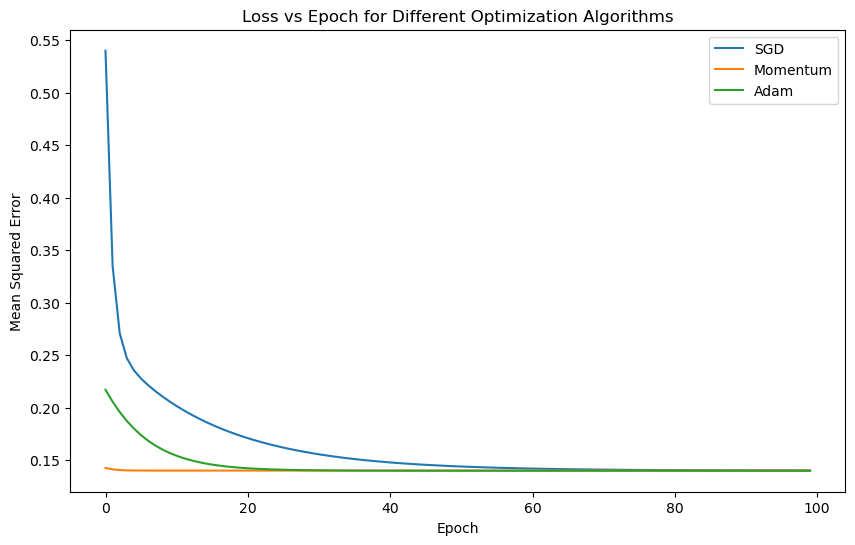

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def mean_squared_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred)**2)

def gradient(w, x, y_true):
    y_pred = w[0] + w[1] * x
    dw0 = -np.mean(y_true - y_pred)
    dw1 = -np.mean((y_true - y_pred) * x)
    return np.array([dw0, dw1])

def sgd(x_train, y_train, learning_rate=0.01, epochs=100):
    w = np.random.randn(2)
    weights_history = [w.copy()]
    losses = []

    for epoch in range(epochs):
        for i in range(len(x_train)):
            gradient_w = gradient(w, x_train[i], y_train[i])
            w = w - learning_rate * gradient_w
            weights_history.append(w.copy())

        y_pred = w[0] + w[1] * x_train
        loss = mean_squared_error(y_train, y_pred)
        losses.append(loss)

    return np.array(weights_history), losses

def momentum_sgd(x_train, y_train, learning_rate=0.01, momentum=0.9, epochs=100):
    w = np.random.randn(2)
    velocity = np.zeros_like(w)
    weights_history = [w.copy()]
    losses = []

    for epoch in range(epochs):
        for i in range(len(x_train)):
            gradient_w = gradient(w, x_train[i], y_train[i])
            velocity = momentum * velocity + learning_rate * gradient_w
            w = w - velocity
            weights_history.append(w.copy())

        y_pred = w[0] + w[1] * x_train
        loss = mean_squared_error(y_train, y_pred)
        losses.append(loss)

    return np.array(weights_history), losses

def adam(x_train, y_train, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100):
    w = np.random.randn(2)
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    t = 0
    weights_history = [w.copy()]
    losses = []

    for epoch in range(epochs):
        for i in range(len(x_train)):
            t += 1
            gradient_w = gradient(w, x_train[i], y_train[i])
            m = beta1 * m + (1 - beta1) * gradient_w
            v = beta2 * v + (1 - beta2) * (gradient_w ** 2)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            w = w - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            weights_history.append(w.copy())

        y_pred = w[0] + w[1] * x_train
        loss = mean_squared_error(y_train, y_pred)
        losses.append(loss)

    return np.array(weights_history), losses


x_train, y_train = data(sinusoidal, 50, 0.25)

# Baseline SGD
weights_sgd, losses_sgd = sgd(x_train, y_train)

# Momentum
weights_momentum, losses_momentum = momentum_sgd(x_train, y_train)

# Adam
weights_adam, losses_adam = adam(x_train, y_train)


plt.figure(figsize=[10, 6])
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_adam, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Loss vs Epoch for Different Optimization Algorithms')
plt.show()